In [53]:
# import image module
from IPython.display import Image
  


# Background:

Special mute is the "Mute this user" link in the left under “Tools” on a user page. Before this feature was launched, users could mute a user through "Preferences" link on the top of a user page.
We have gathered the mute list usage after the special mute feature was launched. ([T244781](https://phabricator.wikimedia.org/T244781), [T262474](https://phabricator.wikimedia.org/T262474),   [T278267](https://phabricator.wikimedia.org/T278267)) 


The instrumentation of the special mute was decommissioned in March 2023.([T329718](https://phabricator.wikimedia.org/T329718))
We'd like to have a final analysis of mute usage with the data we have collected.
<br />

__Analysis TICKET__: [T336899](https://phabricator.wikimedia.org/T336899)

__Traditional Mute__

In [55]:

Image(url="Pics/traditional_mute.png", width=300, height=300)

__Special Mute__

In [58]:

Image(url="Pics/special_mute.png", width=150, height=300)




# Data timeframe
2021-01 ~ 2023-05 <br />
Reran on May 24,2023 to check the trend after our last analysis, from 2021-01 to 2023-05. Special mute is captuered in table `event_sanitized.specialmutesubmit`  (code enabled on September 25, 2020, and decomssioned in March 2023 ). We have permanent data between Oct. 2020  and Mar. 2023.

 
 

In [15]:
import datetime as dt
import pandas as pd
from wmfdata import hive
import numpy as np

In [62]:
import wmfdata
wmfdata.utils.insert_code_toggle()

# Traditional Mute
## 1. Monthly mute usage across all wikis

In [31]:
monthly_mute_usage_query = '''
SELECT  DATE_FORMAT(dt, 'yyyy-MM-01')   AS year_month, COUNT(1) AS mute_count
FROM event_sanitized.prefupdate 
WHERE year IN (2021,2022, 2023)
AND array_contains(array(event.property),'echo-notifications-blacklist') 
GROUP BY   DATE_FORMAT(dt, 'yyyy-MM-01') 
-- HAVING  substr( dt, 1, 7)  != '2023-05'
ORDER BY  year_month
LIMIT 1000
'''

In [32]:
monthly_mute_usage = hive.run(monthly_mute_usage_query)

/home/jiawang/.conda/envs/2023-03-22T22.58.56_jiawang/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [33]:
monthly_mute_usage

,year_month,mute_count
0,2021-01-01,1405
1,2021-02-01,1101
2,2021-03-01,1090
3,2021-04-01,113
4,2021-05-01,114
5,2021-06-01,71
6,2021-07-01,86
7,2021-08-01,121
8,2021-09-01,132
9,2021-10-01,133


In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

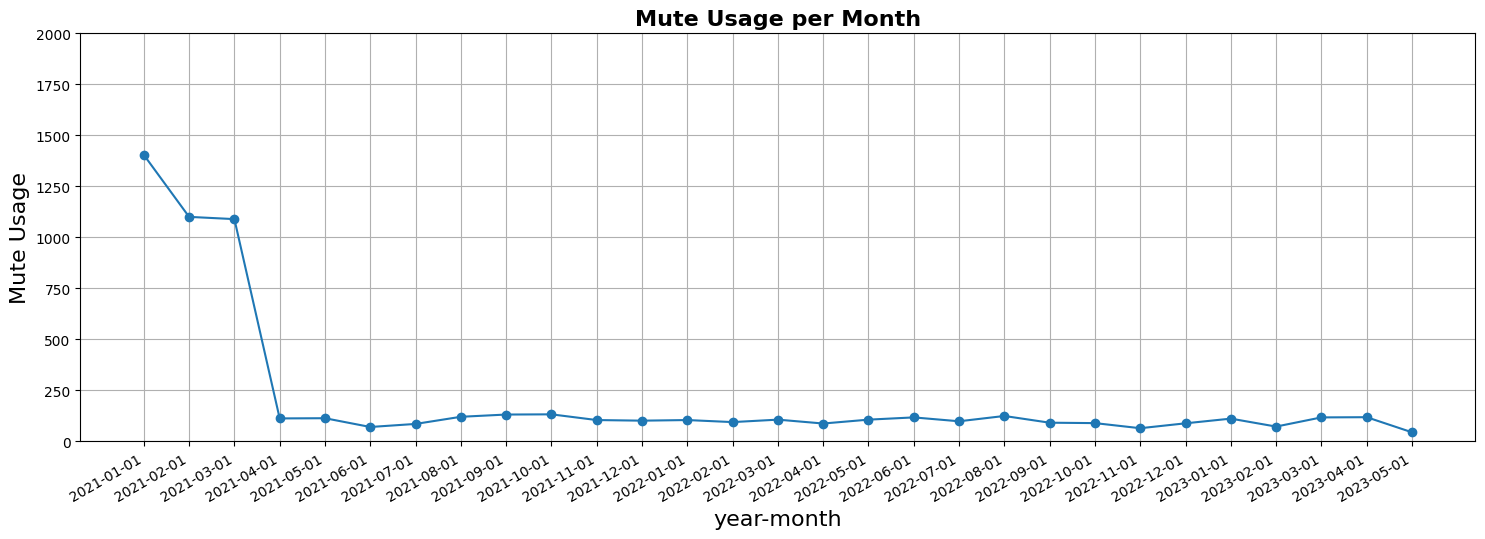

In [36]:
plt.figure(figsize=(18, 6))
plt.ylim(0, 2000)
plt.grid(True)
plt.title('Mute Usage per Month',fontweight="bold",fontsize = 16)
plt.xlabel('year-month',fontsize = 16)
plt.ylabel('Mute Usage',fontsize = 16)
plt.gcf().autofmt_xdate()
plt.plot(monthly_mute_usage['year_month'],monthly_mute_usage['mute_count'], 'o-' )
plt.savefig("Figures/mute_usage_per_month_trend.png")
plt.show()

### Note
The increase in traditional mute usage, starting from Jun 2020,  came to an end in April 2021.
The growth is mainly from French Wikipedia (frwiki) and Italian Wikipedia (itwiki). Since April 2021, it returned to its previous level and stayed flat.

## 2. Top 20 mute usage by wiki 


### 2021

In [37]:
mute_usage_per_wiki_query_2021 = '''
SELECT wiki, COUNT(1) AS mute_count
FROM event_sanitized.prefupdate
WHERE year = 2021
AND array_contains(array(event.property),'echo-notifications-blacklist')
GROUP BY wiki
ORDER BY mute_count DESC
LIMIT 20
'''

In [38]:
mute_usage_per_wiki_2021 = hive.run(mute_usage_per_wiki_query_2021)

/home/jiawang/.conda/envs/2023-03-22T22.58.56_jiawang/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [39]:
mute_usage_per_wiki_2021

,wiki,mute_count
0,frwiki,1964
1,itwiki,1213
2,enwiki,518
3,jawiki,87
4,dewiki,71
5,commonswiki,70
6,ruwiki,66
7,zhwiki,54
8,mediawikiwiki,49
9,eswiki,45


### 2022

In [8]:
mute_usage_per_wiki_query = '''
SELECT wiki, COUNT(1) AS mute_count
FROM event_sanitized.prefupdate
WHERE year = 2022
AND array_contains(array(event.property),'echo-notifications-blacklist')
GROUP BY wiki
ORDER BY mute_count DESC
LIMIT 20
'''

In [9]:
mute_usage_per_wiki = hive.run(mute_usage_per_wiki_query)

/home/jiawang/.conda/envs/2023-03-22T22.58.56_jiawang/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [18]:
mute_usage_per_wiki

,wiki,mute_count
0,enwiki,429
1,jawiki,107
2,mediawikiwiki,61
3,commonswiki,58
4,metawiki,50
5,eswiki,47
6,ruwiki,36
7,zhwiki,35
8,dewiki,35
9,frwiki,32


### 2023

In [19]:
mute_usage_per_wiki_query_2023 = '''
SELECT wiki, COUNT(1) AS mute_count
FROM event_sanitized.prefupdate
WHERE year = 2023
AND array_contains(array(event.property),'echo-notifications-blacklist')
GROUP BY wiki
ORDER BY mute_count DESC
LIMIT 20
'''

In [20]:
mute_usage_per_wiki_2023 = hive.run(mute_usage_per_wiki_query_2023)

/home/jiawang/.conda/envs/2023-03-22T22.58.56_jiawang/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [21]:
mute_usage_per_wiki_2023 

,wiki,mute_count
0,None,212
1,enwiki,65
2,jawiki,15
3,fawiki,11
4,idwiki,11
5,frwiki,11
6,hewiki,10
7,mediawikiwiki,10
8,zhwiki,10
9,metawiki,9


After 2023-03-16T19:54:52.302Z, wiki is null in event_sanitized.prefupdate

In [43]:
mute_usage_per_wiki_query_2023 = '''
SELECT wiki, COUNT(1) AS mute_count
FROM event_sanitized.prefupdate
WHERE year = 2023 and month IN (1,2,3)
AND array_contains(array(event.property),'echo-notifications-blacklist')
AND CONCAT(year, LPAD(month, 2, '0'), LPAD(day, 2, '0') ) <= "20230315"
GROUP BY wiki
ORDER BY mute_count DESC
LIMIT 20
'''

In [44]:
mute_usage_per_wiki_2023_2 = hive.run(mute_usage_per_wiki_query_2023)

/home/jiawang/.conda/envs/2023-03-22T22.58.56_jiawang/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [45]:
mute_usage_per_wiki_2023_2

,wiki,mute_count
0,enwiki,64
1,jawiki,15
2,frwiki,11
3,fawiki,11
4,idwiki,11
5,mediawikiwiki,10
6,zhwiki,10
7,hewiki,10
8,eswiki,9
9,metawiki,9


### Note
 Enwiki is the top one wiki that mostly used mute list

# Special Mute Usage

## Daily trend

In [2]:
monthly_specialmute_usage_query = '''
SELECT CONCAT(year, LPAD(month, 2, '0')) AS month_n, COUNT(1) AS special_mute
FROM event_sanitized.specialmutesubmit
WHERE 
    CONCAT(year, LPAD(month, 2, '0')) >= "{start}" and
    CONCAT(year, LPAD(month, 2, '0')) <= "{end}"
GROUP BY CONCAT(year, LPAD(month, 2, '0')) 
'''

In [3]:
specialmute_usage = hive.run(monthly_specialmute_usage_query.format(start='202010',end='202305'))
specialmute_usage

/home/jiawang/.conda/envs/2023-03-22T22.58.56_jiawang/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,month_n,special_mute
0,202010,120
1,202011,106
2,202012,153
3,202101,266
4,202102,92
5,202103,164
6,202104,95
7,202105,125
8,202106,95
9,202107,100


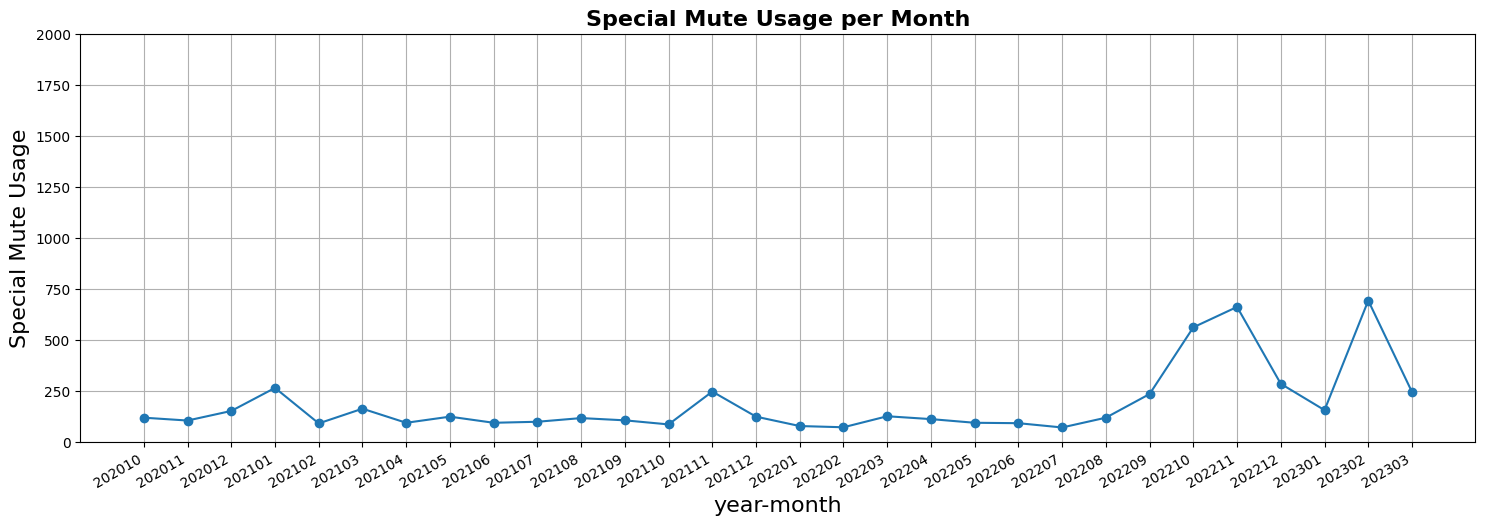

In [42]:
plt.figure(figsize=(18, 6))
plt.ylim(0, 2000)
plt.grid(True)
plt.title('Special Mute Usage per Month',fontweight="bold",fontsize = 16)
plt.xlabel('year-month',fontsize = 16)
plt.ylabel('Special Mute Usage',fontsize = 16)
plt.gcf().autofmt_xdate()
plt.plot(specialmute_usage['month_n'],specialmute_usage['special_mute'], 'o-' )
plt.savefig("Figures/special_mute_usage.png")
plt.show()

In [65]:
wiki_specialmute_usage_query = '''
SELECT CONCAT(year, LPAD(month, 2, '0')) AS month_n,wiki, COUNT(1) AS special_mute
FROM event_sanitized.specialmutesubmit
WHERE 
    CONCAT(year, LPAD(month, 2, '0')) >= "{start}" and
    CONCAT(year, LPAD(month, 2, '0')) <= "{end}"
GROUP BY CONCAT(year, LPAD(month, 2, '0')) ,wiki
ORDER BY month_n,special_mute DESC
LIMIT 10000
'''

In [66]:
specialmute_usage_wiki = hive.run(wiki_specialmute_usage_query.format(start='202205',end='202305'))
specialmute_usage_wiki

/home/jiawang/.conda/envs/2023-03-22T22.58.56_jiawang/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,month_n,wiki,special_mute
0,202205,enwiki,48
1,202205,thwiki,5
2,202205,frwiki,4
3,202205,jawiki,4
4,202205,foundationwiki,4
...,...,...,...
401,202303,itwiki,1
402,202303,jawiki,1
403,202303,newiki,1
404,202303,ruwiki,1


In [67]:
specialmute_usage_wiki.to_csv('special_mute_wiki.csv')

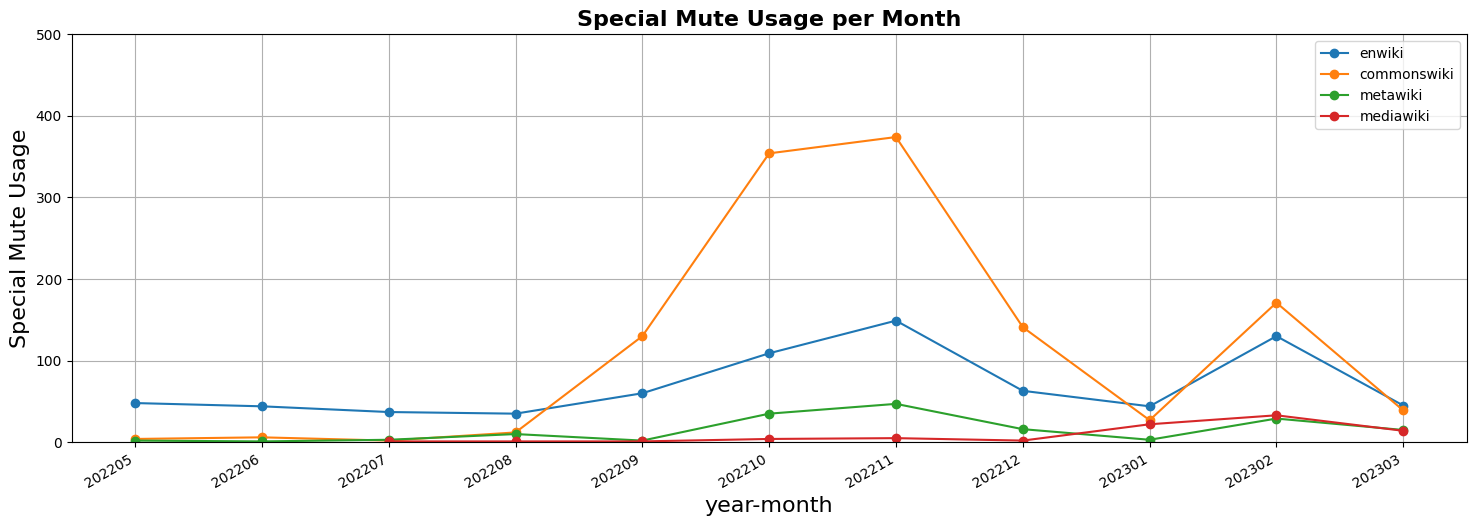

In [80]:
plt.figure(figsize=(18, 6))
plt.ylim(0, 500)
plt.grid(True)
plt.title('Special Mute Usage per Month',fontweight="bold",fontsize = 16)
plt.xlabel('year-month',fontsize = 16)
plt.ylabel('Special Mute Usage',fontsize = 16)
plt.gcf().autofmt_xdate()
plt.plot(specialmute_usage_wiki[specialmute_usage_wiki['wiki']=='enwiki']['month_n'],specialmute_usage_wiki[specialmute_usage_wiki['wiki']=='enwiki']['special_mute'], 'o-', label='enwiki' )
plt.plot(specialmute_usage_wiki[specialmute_usage_wiki['wiki']=='commonswiki']['month_n'],specialmute_usage_wiki[specialmute_usage_wiki['wiki']=='commonswiki']['special_mute'], 'o-',label='commonswiki' )
plt.plot(specialmute_usage_wiki[specialmute_usage_wiki['wiki']=='metawiki']['month_n'],specialmute_usage_wiki[specialmute_usage_wiki['wiki']=='metawiki']['special_mute'], 'o-', label='metawiki' )
plt.plot(specialmute_usage_wiki[specialmute_usage_wiki['wiki']=='mediawikiwiki']['month_n'],specialmute_usage_wiki[specialmute_usage_wiki['wiki']=='mediawikiwiki']['special_mute'], 'o-',label='mediawiki')
#plt.plot(specialmute_usage_wiki[specialmute_usage_wiki['wiki']=='enwikibooks']['month_n'],specialmute_usage_wiki[specialmute_usage_wiki['wiki']=='enwikibooks']['special_mute'], 'o-' , label='enwikibook')

plt.legend(loc='upper right')


plt.show()

### Note
- 2020-10 is an incomplete month as we just started to keep sanitized data.   
- 2023-03 is an incomplete month as we decommissioned instrumentation in March, 2023.   

- The usage of special mute has surged twice from September 2022 to March 2023,  reaching its peak at 694 in February 2023. 
-  Wiki Commons, English Wikipedia, Meta Wiki and Media wiki the primary contributors to the growth.


## User behavior analysis on option selection

In [46]:
specialmute_selection_query = '''
SELECT 
 CONCAT(tmp.year, LPAD(tmp.month, 2, '0')) AS y_m, tmp.selection, COUNT(1)
FROM 
(
SELECT *, CASE WHEN event.emailsAfter AND  event.notificationsAfter THEN 'email_and_notifi' WHEN event.notificationsAfter THEN 'notifi_only' WHEN event.emailsAfter THEN 'email_only' ELSE 'un_mute' END AS selection 
FROM event_sanitized.specialmutesubmit
WHERE     CONCAT(year, LPAD(month, 2, '0')) >= "{start}" and
    CONCAT(year, LPAD(month, 2, '0')) <= "{end}"
) AS tmp
GROUP BY CONCAT(tmp.year, LPAD(tmp.month, 2, '0')) , tmp.selection
'''

In [47]:
specialmute_selection = hive.run(specialmute_selection_query.format(start='202010',end='202305'))
specialmute_selection

/home/jiawang/.conda/envs/2023-03-22T22.58.56_jiawang/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,y_m,selection,_c2
0,202010,email_and_notifi,47
1,202010,email_only,17
2,202010,notifi_only,48
3,202010,un_mute,8
4,202011,email_and_notifi,32
...,...,...,...
114,202302,notifi_only,418
115,202302,un_mute,11
116,202303,email_and_notifi,93
117,202303,email_only,1


In [50]:
df_special_mute_wide = pd.pivot_table(specialmute_selection, values='_c2', index=['y_m'],
                       columns=['selection'], aggfunc=np.sum, fill_value=0)

In [51]:
df_special_mute_wide

selection,email_and_notifi,email_only,notifi_only,un_mute
y_m,,,,
202010,47,17,48,8
202011,32,20,46,8
202012,62,28,55,8
202101,189,18,51,8
202102,23,20,38,11
202103,47,21,84,12
202104,26,20,45,4
202105,39,28,51,7
202106,38,18,32,7


### Note
The current analysis result is the same as the previous one.
Users have two options to select: mute notifications and mute email. The two most popular selection combinations are: 1) mute both notification and email, 2) mute notification only. 
